In [1]:
import numpy as np
import pandas as pd
from uncertainties import unumpy, ufloat

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.legend import Legend
from matplotlib.ticker import FormatStrFormatter

import seaborn as sns

In [2]:
# https://stackoverflow.com/questions/22348756/upright-mu-in-plot-label-retaining-original-tick-fonts
# https://stackoverflow.com/questions/2537868/sans-serif-math-with-latex-in-matplotlib

import matplotlib
from matplotlib import rc

matplotlib.rc('text', usetex = True)
matplotlib.rc('font', **{'family':'sans-serif'})

## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})

#params = {'text.latex.preamble':[r'\usepackage{siunitx}',
#                                 r'\usepackage{amsmath}',
#                                 r'\usepackage{physics}',
#                                 r'\usepackage{sfmath}',
#                                 r'\sisetup{detect-all=true}']}

params = {'text.latex.preamble':[r'\usepackage{siunitx}',
                                 r'\usepackage{amsmath}',
                                 r'\usepackage{physics}',
                                 r'\usepackage{helvet}',
                                 r'\usepackage{sansmath}',
                                 r'\sansmath',
                                 r'\sisetup{detect-all}']}
plt.rcParams.update(params)

# Constants

In [3]:
A0 = ufloat(5.29177210903, 0.00000000080)*(1E-11)*(1E9) # [nm] Bohr radius from CODATA

# Functions

In [4]:
# Quantum defect for strontium 5sns, 3S1
def qd(n):
    d0 = ufloat(3.371, 0.002)
    d2 = ufloat(0.5, 0.2)
    d4 = ufloat(-1, 2)*(1E1)
    
    return d0 + d2/(n-d0)**2 + d4/(n-d0)**4

# Returns orbital radius in [nm]. Using <r> = 1/2(3n^2 - l(l+1)) from Gallagher.
def orbital_radius(n):
    return (1/2)*(3*(n-qd(n))**2)*A0

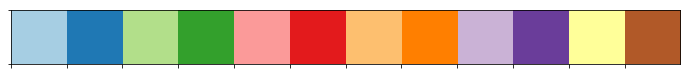

In [5]:
sns.palplot(sns.color_palette("Paired"))

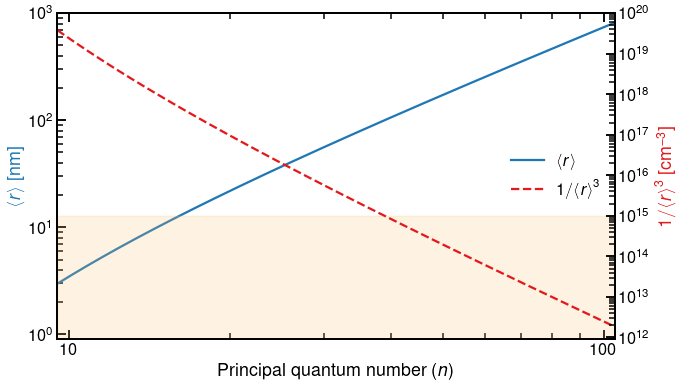

In [21]:
sns.set_context('talk')

ax1_color = sns.color_palette("Paired")[1]
ax2_color = sns.color_palette("Paired")[5]

fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

n = np.linspace(9.5, 105, 1000, endpoint=True)

ev_radius = orbital_radius(n) # <r> in [nm]
ev_rho = 1/ev_radius**3 # 1/<r>^3 in [1/nm^3]
ev_rho = ev_rho*((1E9/1E2)**3) # 1/<r>^3 in [1/cm^3]

radius_nom = unumpy.nominal_values(ev_radius)
radius_unc = unumpy.std_devs(ev_radius)

rho_nom = unumpy.nominal_values(ev_rho)
rho_unc = unumpy.std_devs(ev_rho)

##############################
# Radius and density plot

r_plot = ax1.loglog(n, radius_nom, color=ax1_color, zorder=2, label=r'$\ev{r}$')
#ax1.fill_between(n, radius_nom+radius_unc, radius_nom-radius_unc)

rho_plot = ax2.loglog(n, rho_nom, '--', color=ax2_color, zorder=1, label=r'${1}/{\ev{r}^3}$')
#ax2.fill_between(n, rho_nom+rho_unc, rho_nom-rho_unc)

##############################
# Typical cold gas experiment regime
ax2.fill_between(n, 1E9, 1E15, zorder=0, color=sns.color_palette("Paired")[6], alpha=0.2)

##############################
# Axis tick options
for ax in [ax1, ax2]:
    ax.tick_params(which='both', axis='both', direction='in')

ax1.xaxis.set_ticks_position('both')

ax1.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# Axis limits
ax1.set_xlim((min(n), max(n)))
ax1.set_ylim((0.9, 1E3))
ax2.set_ylim((0.9E12, 1E20))

# Axis labels
ax1.set_xlabel(r'Principal quantum number ($n$)')
ax1.set_ylabel(r'$\ev{r}$ [\si{\nm}]', color=ax1_color)
ax2.set_ylabel(r'${1}/{\ev{r}^3}$ [\si{\per\cm\cubed}]', color=ax2_color)

# added these three lines
lns = r_plot + rho_plot
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='center right', frameon=False)

plt.savefig('orbital_radius-density_n-scaling.pdf', bbox_inches='tight')

plt.show()